In [1]:
import pandas as pd

# Load the datasets
x_train = pd.read_csv('./X_train.csv')
y_train = pd.read_csv('./y_train.csv')
x_test  = pd.read_csv('./X_test.csv')

# Display the first few rows of each dataset
x_train_head, y_train_head, x_test_head = x_train.head(), y_train.head(), x_test.head()
x_train_head, y_train_head, x_test_head


(   Unnamed: 0  Education  JoiningYear       City  PaymentTier   Age  Gender  \
 0        1847  Bachelors         2016  Bangalore            3  27.0    Male   
 1        2905  Bachelors         2012  Bangalore            3  28.0    Male   
 2        4610  Bachelors         2015       Pune            3  26.0  Female   
 3        2228  Bachelors         2012  Bangalore            3  29.0    Male   
 4           5  Bachelors         2016  Bangalore            3  24.0    Male   
 
   EverBenched  ExperienceInCurrentDomain    id   Race  
 0         Yes                          4  1847  white  
 1          No                          4  2905  white  
 2          No                          2  4610  white  
 3          No                          1  2228  black  
 4          No                          0     5  white  ,
    Unnamed: 0  LeaveOrNot
 0        1847           0
 1        2905           0
 2        4610           1
 3        2228           0
 4           5           0,
    Unnamed:

In [2]:
# Merge x_train and y_train using the appropriate columns
train = x_train.merge(y_train, left_on="id", right_on="Unnamed: 0")
train


,Unnamed: 0_x,Education,JoiningYear,City,PaymentTier,Age,Gender,EverBenched,ExperienceInCurrentDomain,id,Race,Unnamed: 0_y,LeaveOrNot
0,1847,Bachelors,2016,Bangalore,3,27.0,Male,Yes,4,1847,white,1847,0
1,2905,Bachelors,2012,Bangalore,3,28.0,Male,No,4,2905,white,2905,0
2,4610,Bachelors,2015,Pune,3,26.0,Female,No,2,4610,white,4610,1
3,2228,Bachelors,2012,Bangalore,3,29.0,Male,No,1,2228,black,2228,0
4,5,Bachelors,2016,Bangalore,3,24.0,Male,No,0,5,white,5,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3717,3335,Bachelors,2016,Bangalore,3,38.0,Female,No,0,3335,white,3335,0
3718,1099,Masters,2017,Pune,2,29.0,Male,No,5,1099,white,1099,1
3719,2514,Bachelors,2016,Pune,3,31.0,Male,No,5,2514,black,2514,0
3720,3606,Bachelors,2013,Pune,2,36.0,Female,No,3,3606,black,3606,1


In [3]:
# Drop the redundant columns after merging
train.drop(columns=["Unnamed: 0_x", "Unnamed: 0_y"], inplace=True)
train


,Education,JoiningYear,City,PaymentTier,Age,Gender,EverBenched,ExperienceInCurrentDomain,id,Race,LeaveOrNot
0,Bachelors,2016,Bangalore,3,27.0,Male,Yes,4,1847,white,0
1,Bachelors,2012,Bangalore,3,28.0,Male,No,4,2905,white,0
2,Bachelors,2015,Pune,3,26.0,Female,No,2,4610,white,1
3,Bachelors,2012,Bangalore,3,29.0,Male,No,1,2228,black,0
4,Bachelors,2016,Bangalore,3,24.0,Male,No,0,5,white,0
...,...,...,...,...,...,...,...,...,...,...,...
3717,Bachelors,2016,Bangalore,3,38.0,Female,No,0,3335,white,0
3718,Masters,2017,Pune,2,29.0,Male,No,5,1099,white,1
3719,Bachelors,2016,Pune,3,31.0,Male,No,5,2514,black,0
3720,Bachelors,2013,Pune,2,36.0,Female,No,3,3606,black,1


In [4]:
# Total number of rows in the dataset
total_rows = train.shape[0]
total_rows


3722

In [5]:
# Check for missing values
missing_values = train.isnull().sum()
missing_values


Education                    0
JoiningYear                  0
City                         0
PaymentTier                  0
Age                          2
Gender                       2
EverBenched                  0
ExperienceInCurrentDomain    0
id                           0
Race                         0
LeaveOrNot                   0
dtype: int64

In [6]:
# Check for duplicates excluding the 'id' column
duplicates_excluding_id = train.duplicated(subset=train.columns.difference(['id'])).sum()
duplicates_excluding_id


807

In [7]:
# Summary statistics for numerical columns
numerical_summary = x_train.describe()
numerical_summary


,Unnamed: 0,JoiningYear,PaymentTier,Age,ExperienceInCurrentDomain,id
count,3722.000000,3722.000000,3722.000000,3720.000000,3722.000000,3722.000000
mean,2347.907039,2015.075497,2.696400,30.928763,2.897904,2347.907039
std,1336.606928,1.864950,0.558565,4.860963,1.562391,1336.606928
min,0.000000,2012.000000,1.000000,23.000000,0.000000,0.000000
25%,1206.250000,2014.000000,2.000000,27.000000,2.000000,1206.250000
50%,2366.500000,2015.000000,3.000000,29.000000,3.000000,2366.500000
75%,3496.500000,2017.000000,3.000000,34.000000,4.000000,3496.500000
max,4651.000000,2018.000000,3.000000,43.000000,7.000000,4651.000000


In [8]:
# Remove duplicate rows (excluding the 'id' column)
train = train.drop_duplicates(subset=train.columns.difference(['id']))
train


,Education,JoiningYear,City,PaymentTier,Age,Gender,EverBenched,ExperienceInCurrentDomain,id,Race,LeaveOrNot
0,Bachelors,2016,Bangalore,3,27.0,Male,Yes,4,1847,white,0
1,Bachelors,2012,Bangalore,3,28.0,Male,No,4,2905,white,0
2,Bachelors,2015,Pune,3,26.0,Female,No,2,4610,white,1
3,Bachelors,2012,Bangalore,3,29.0,Male,No,1,2228,black,0
4,Bachelors,2016,Bangalore,3,24.0,Male,No,0,5,white,0
...,...,...,...,...,...,...,...,...,...,...,...
3714,Bachelors,2014,New Delhi,3,29.0,Male,No,5,2773,white,0
3715,Bachelors,2012,Bangalore,3,30.0,Male,No,2,2635,black,1
3716,Masters,2014,New Delhi,3,29.0,Female,No,1,433,white,0
3719,Bachelors,2016,Pune,3,31.0,Male,No,5,2514,black,0


In [9]:
# Remove rows with missing values
train = train.dropna()
train


,Education,JoiningYear,City,PaymentTier,Age,Gender,EverBenched,ExperienceInCurrentDomain,id,Race,LeaveOrNot
0,Bachelors,2016,Bangalore,3,27.0,Male,Yes,4,1847,white,0
1,Bachelors,2012,Bangalore,3,28.0,Male,No,4,2905,white,0
2,Bachelors,2015,Pune,3,26.0,Female,No,2,4610,white,1
3,Bachelors,2012,Bangalore,3,29.0,Male,No,1,2228,black,0
4,Bachelors,2016,Bangalore,3,24.0,Male,No,0,5,white,0
...,...,...,...,...,...,...,...,...,...,...,...
3714,Bachelors,2014,New Delhi,3,29.0,Male,No,5,2773,white,0
3715,Bachelors,2012,Bangalore,3,30.0,Male,No,2,2635,black,1
3716,Masters,2014,New Delhi,3,29.0,Female,No,1,433,white,0
3719,Bachelors,2016,Pune,3,31.0,Male,No,5,2514,black,0


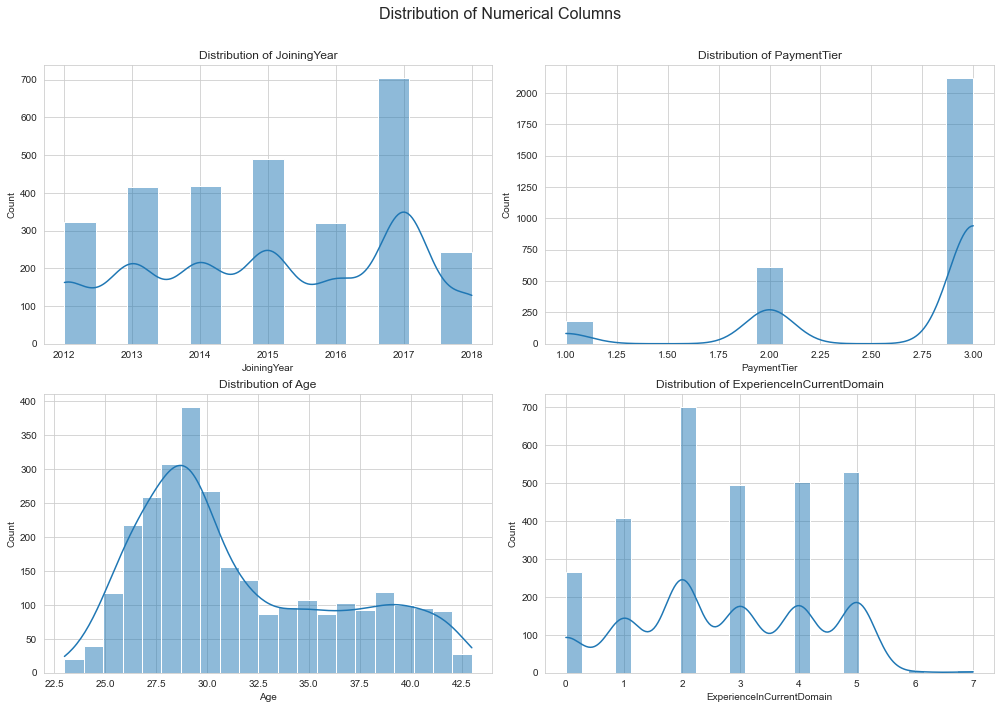

In [10]:
#Distribution of these numerical columns
import matplotlib.pyplot as plt
import seaborn as sns

# Setting up the style for visualization
sns.set_style("whitegrid")

# Plotting the distribution for numerical columns
fig, axes = plt.subplots(2, 2, figsize=(14, 10))
fig.suptitle('Distribution of Numerical Columns', fontsize=16)

sns.histplot(train['JoiningYear'], ax=axes[0, 0], kde=True)
axes[0, 0].set_title('Distribution of JoiningYear')

sns.histplot(train['PaymentTier'], ax=axes[0, 1], kde=True)
axes[0, 1].set_title('Distribution of PaymentTier')

sns.histplot(train['Age'], ax=axes[1, 0], kde=True)
axes[1, 0].set_title('Distribution of Age')

sns.histplot(train['ExperienceInCurrentDomain'], ax=axes[1, 1], kde=True)
axes[1, 1].set_title('Distribution of ExperienceInCurrentDomain')

plt.tight_layout()
plt.subplots_adjust(top=0.90)
plt.show()


In [11]:
age_stats = train['Age'].describe()
age_stats


count    2913.000000
mean       31.556128
std         5.051761
min        23.000000
25%        28.000000
50%        30.000000
75%        35.000000
max        43.000000
Name: Age, dtype: float64

In [12]:
export_path = "./combined_train_cleaned.csv"
train.to_csv(export_path, index=False)

export_path


'./combined_train_cleaned.csv'

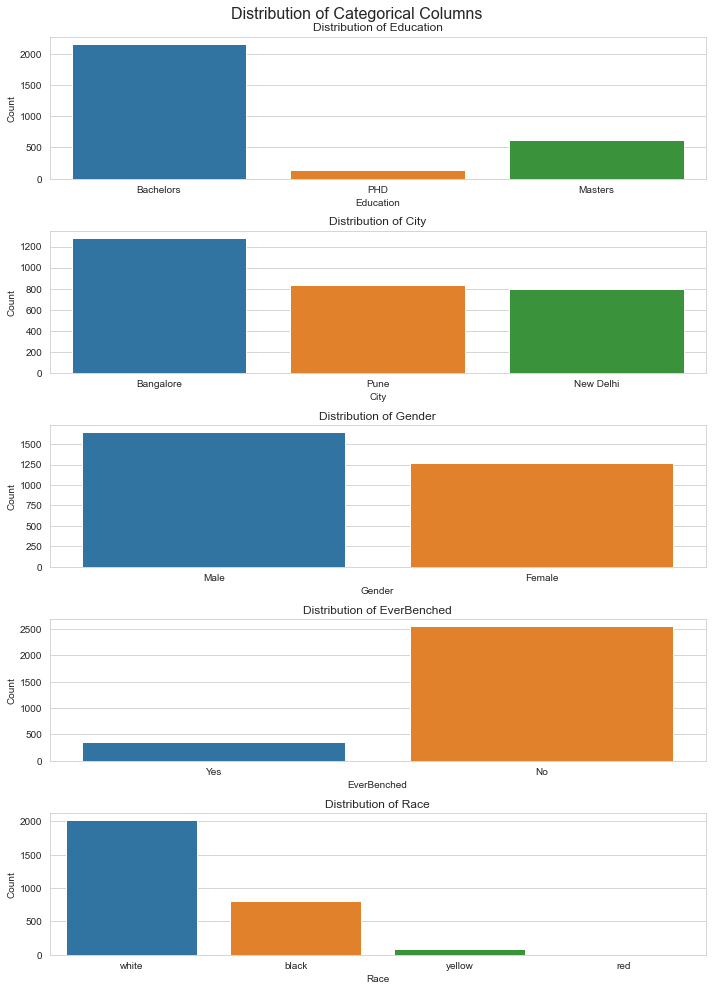

In [13]:
# Categorical columns to explore
categorical_columns = ['Education', 'City', 'Gender', 'EverBenched', 'Race']

# Plotting the distribution for categorical columns
fig, axes = plt.subplots(len(categorical_columns), 1, figsize=(10, 14))
fig.suptitle('Distribution of Categorical Columns', fontsize=16)

for i, col in enumerate(categorical_columns):
    sns.countplot(data=train, x=col, ax=axes[i])
    axes[i].set_title(f'Distribution of {col}')
    axes[i].set_ylabel('Count')

plt.tight_layout()
plt.subplots_adjust(top=0.95)
plt.show()


<b>Education:</b> The majority of employees possess a Bachelor's degree, with a smaller proportion holding a Master's degree.<br />
<b>City:</b> Bangalore is the predominant city where most employees are located, followed by Pune and Mumbai.<br />
<b>Gender:</b> There are more male employees compared to female employees in the dataset.<br />
<b>EverBenched:</b> A significant majority of employees have not experienced being benched.<br />
<b>Race:</b> Most employees are identified as "white," with "black" being the next most common racial category.

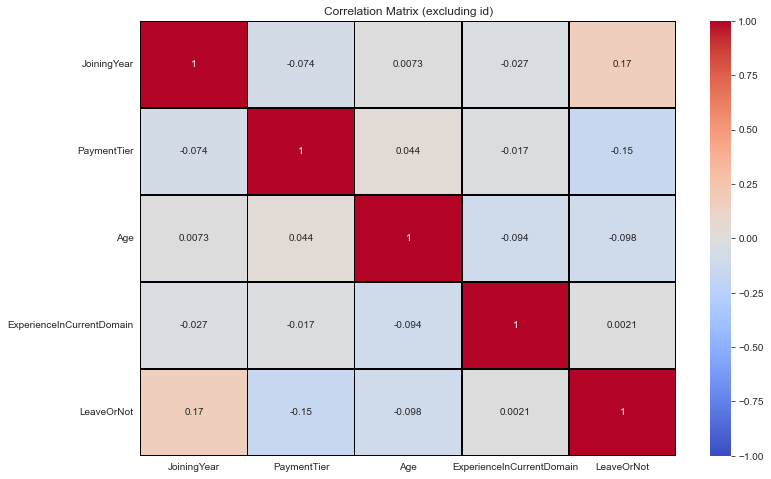

In [14]:
# Drop the 'id' column and compute the correlation matrix again
correlation_matrix_without_id = train.drop(columns=['id']).corr()

# Plotting the heatmap without 'id'
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix_without_id, annot=True, cmap='coolwarm', vmin=-1, vmax=1, linewidths=0.5, linecolor='black')
plt.title('Correlation Matrix (excluding id)')
plt.show()


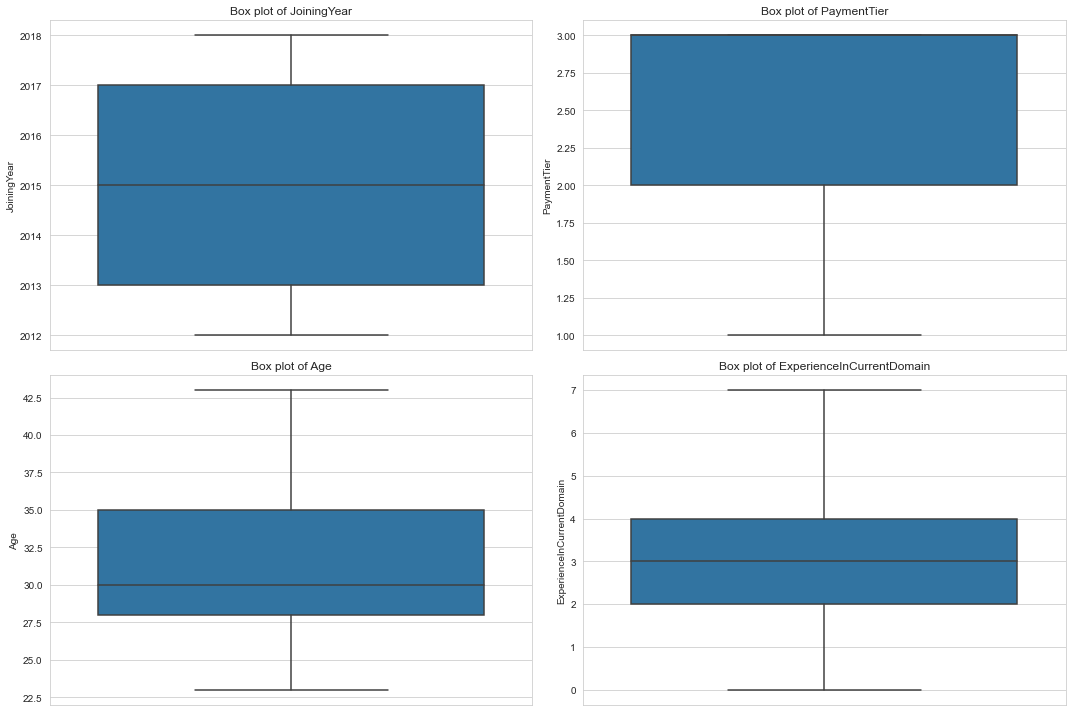

In [15]:
# Outlier detection - Visualizing box plots for numerical columns
numerical_columns = ['JoiningYear', 'PaymentTier', 'Age', 'ExperienceInCurrentDomain']

plt.figure(figsize=(15, 10))
for i, col in enumerate(numerical_columns, 1):
    plt.subplot(2, 2, i)
    sns.boxplot(y=train[col])
    plt.title(f'Box plot of {col}')
    plt.ylabel(col)

plt.tight_layout()
plt.show()


In [16]:
# Exporting the current dataframe
path = ".\combined_train_modified_before_encoding.csv"
train.to_csv(path, index=False)


In [17]:
# Encode categorial columns
# Display unique values in the 'Education' column
unique_education_values = train['Education'].unique()
unique_education_values


array(['Bachelors', 'PHD', 'Masters'], dtype=object)

In [18]:
#Suggested Encoding: Label Encoding
#Bachelors can be encoded as 1
#Masters can be encoded as 2
#PHD can be encoded as 3

# Define a mapping for the Education column for label encoding
education_mapping = {
    'Bachelors': 1,
    'Masters': 2,
    'PHD': 3
}

# Apply the mapping to the Education column
train['Education_encoded'] = train['Education'].map(education_mapping)

# Display the first few rows to check the encoding
train[['Education', 'Education_encoded']].head()


C:\Users\yaniv\anaconda3\lib\site-packages\ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,Education,Education_encoded
0,Bachelors,1
1,Bachelors,1
2,Bachelors,1
3,Bachelors,1
4,Bachelors,1


In [19]:
#City: Nominal (the cities don't have a specific order or hierarchy) -> One-Hot Encoding
# Display unique values in the 'City' column and their count
unique_city_values = train['City'].nunique()
unique_city_values


3

In [20]:
# Check unique city values in the modified dataset
unique_cities_after_encoding = train['City'].unique()
unique_cities_after_encoding


array(['Bangalore', 'Pune', 'New Delhi'], dtype=object)

In [21]:
# One-hot encode the 'City' column
city_dummies = pd.get_dummies(train['City'], prefix='City')
city_dummies


,City_Bangalore,City_New Delhi,City_Pune
0,1,0,0
1,1,0,0
2,0,0,1
3,1,0,0
4,1,0,0
...,...,...,...
3714,0,1,0
3715,1,0,0
3716,0,1,0
3719,0,0,1


In [22]:
# Append the one-hot encoded columns to the dataframe
train = pd.concat([train, city_dummies], axis=1)
train


,Education,JoiningYear,City,PaymentTier,Age,Gender,EverBenched,ExperienceInCurrentDomain,id,Race,LeaveOrNot,Education_encoded,City_Bangalore,City_New Delhi,City_Pune
0,Bachelors,2016,Bangalore,3,27.0,Male,Yes,4,1847,white,0,1,1,0,0
1,Bachelors,2012,Bangalore,3,28.0,Male,No,4,2905,white,0,1,1,0,0
2,Bachelors,2015,Pune,3,26.0,Female,No,2,4610,white,1,1,0,0,1
3,Bachelors,2012,Bangalore,3,29.0,Male,No,1,2228,black,0,1,1,0,0
4,Bachelors,2016,Bangalore,3,24.0,Male,No,0,5,white,0,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3714,Bachelors,2014,New Delhi,3,29.0,Male,No,5,2773,white,0,1,0,1,0
3715,Bachelors,2012,Bangalore,3,30.0,Male,No,2,2635,black,1,1,1,0,0
3716,Masters,2014,New Delhi,3,29.0,Female,No,1,433,white,0,2,0,1,0
3719,Bachelors,2016,Pune,3,31.0,Male,No,5,2514,black,0,1,0,0,1


In [23]:
# Gender: Nominal (male and female don't have an intrinsic order) -> binary encoding
# Display unique values in the 'Gender' column
unique_gender_values = train['Gender'].unique()
unique_gender_values


array(['Male', 'Female'], dtype=object)

In [24]:
# Define a mapping for the Gender column for binary encoding
gender_mapping = {
    'Male': 0,
    'Female': 1
}

# Apply the mapping to the Gender column
train['Gender_encoded'] = train['Gender'].map(gender_mapping)

# Display the first few rows to check the encoding
train[['Gender', 'Gender_encoded']].head()


,Gender,Gender_encoded
0,Male,0
1,Male,0
2,Female,1
3,Male,0
4,Male,0


In [25]:
#EverBenched: Nominal (binary in nature, indicating whether an employee has been benched or not) -> binary encoding
# Display unique values in the 'EverBenched' column
unique_everbenched_values = train['EverBenched'].unique()
unique_everbenched_values


array(['Yes', 'No'], dtype=object)

In [26]:
# Define a mapping for the EverBenched column for binary encoding
everbenched_mapping = {
    'No': 0,
    'Yes': 1
}

# Apply the mapping to the EverBenched column
train['EverBenched_encoded'] = train['EverBenched'].map(everbenched_mapping)

# Display the first few rows to check the encoding
train[['EverBenched', 'EverBenched_encoded']].head()


,EverBenched,EverBenched_encoded
0,Yes,1
1,No,0
2,No,0
3,No,0
4,No,0


In [27]:
# Race: Nominal (different races don't have an intrinsic order) -> One-Hot Encoding
# Display unique values in the 'Race' column
unique_race_values = train['Race'].unique()
unique_race_values


array(['white', 'black', 'yellow', 'red'], dtype=object)

In [28]:
# One-hot encode the 'Race' column
race_dummies = pd.get_dummies(train['Race'], prefix='Race')

# Append the one-hot encoded columns to the dataframe
train = pd.concat([train, race_dummies], axis=1)

# Display the first few rows to check the encoding
train[['Race'] + [col for col in race_dummies.columns]].head()


,Race,Race_black,Race_red,Race_white,Race_yellow
0,white,0,0,1,0
1,white,0,0,1,0
2,white,0,0,1,0
3,black,1,0,0,0
4,white,0,0,1,0


In [29]:
# Drop the original categorical columns
columns_to_drop = ['Education', 'City', 'Gender', 'EverBenched', 'Race']
train.drop(columns=columns_to_drop, inplace=True)

# Display the first few rows of the updated dataframe
train.head()


,JoiningYear,PaymentTier,Age,ExperienceInCurrentDomain,id,LeaveOrNot,Education_encoded,City_Bangalore,City_New Delhi,City_Pune,Gender_encoded,EverBenched_encoded,Race_black,Race_red,Race_white,Race_yellow
0,2016,3,27.0,4,1847,0,1,1,0,0,0,1,0,0,1,0
1,2012,3,28.0,4,2905,0,1,1,0,0,0,0,0,0,1,0
2,2015,3,26.0,2,4610,1,1,0,0,1,1,0,0,0,1,0
3,2012,3,29.0,1,2228,0,1,1,0,0,0,0,1,0,0,0
4,2016,3,24.0,0,5,0,1,1,0,0,0,0,0,0,1,0


In [30]:
# Exporting the current dataframe after dropping original categorical columns
path_after_drop = "./combined_train_after_dropping_categoricals.csv"
train.to_csv(path_after_drop, index=False)


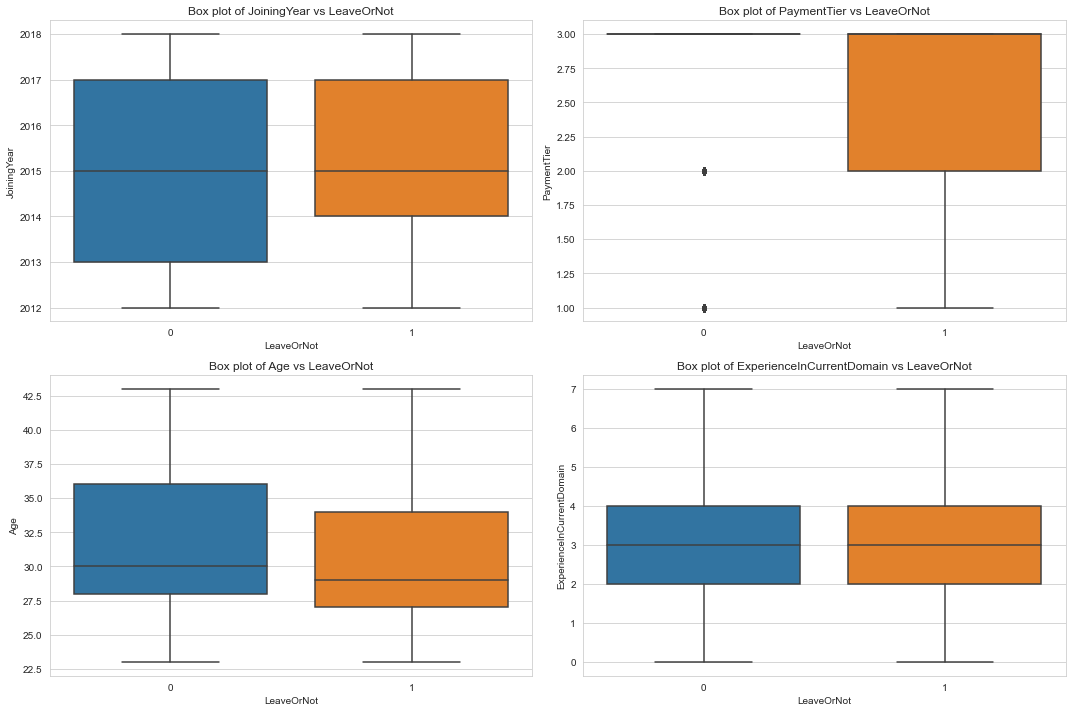

In [31]:
# List of continuous features for visual exploration
continuous_features = ['JoiningYear', 'PaymentTier', 'Age', 'ExperienceInCurrentDomain']

# Plotting box plots for each continuous feature against the label 'LeaveOrNot'
plt.figure(figsize=(15, 10))
for i, feature in enumerate(continuous_features, 1):
    plt.subplot(2, 2, i)
    sns.boxplot(x='LeaveOrNot', y=feature, data=train)
    plt.title(f'Box plot of {feature} vs LeaveOrNot')
    plt.xlabel('LeaveOrNot')
    plt.ylabel(feature)

plt.tight_layout()
plt.show()


In [32]:
# Calculate correlations of all features with the 'LeaveOrNot' label
correlations_with_label = train.corr()['LeaveOrNot'].sort_values()

# Display correlations
correlations_with_label


PaymentTier                 -0.151515
City_Bangalore              -0.100326
Age                         -0.097946
id                          -0.071319
City_New Delhi              -0.061941
Race_black                  -0.014763
Race_yellow                 -0.004658
ExperienceInCurrentDomain    0.002108
Race_white                   0.013757
Race_red                     0.028202
EverBenched_encoded          0.042071
Education_encoded            0.049532
JoiningYear                  0.170831
City_Pune                    0.171246
Gender_encoded               0.178567
LeaveOrNot                   1.000000
Name: LeaveOrNot, dtype: float64

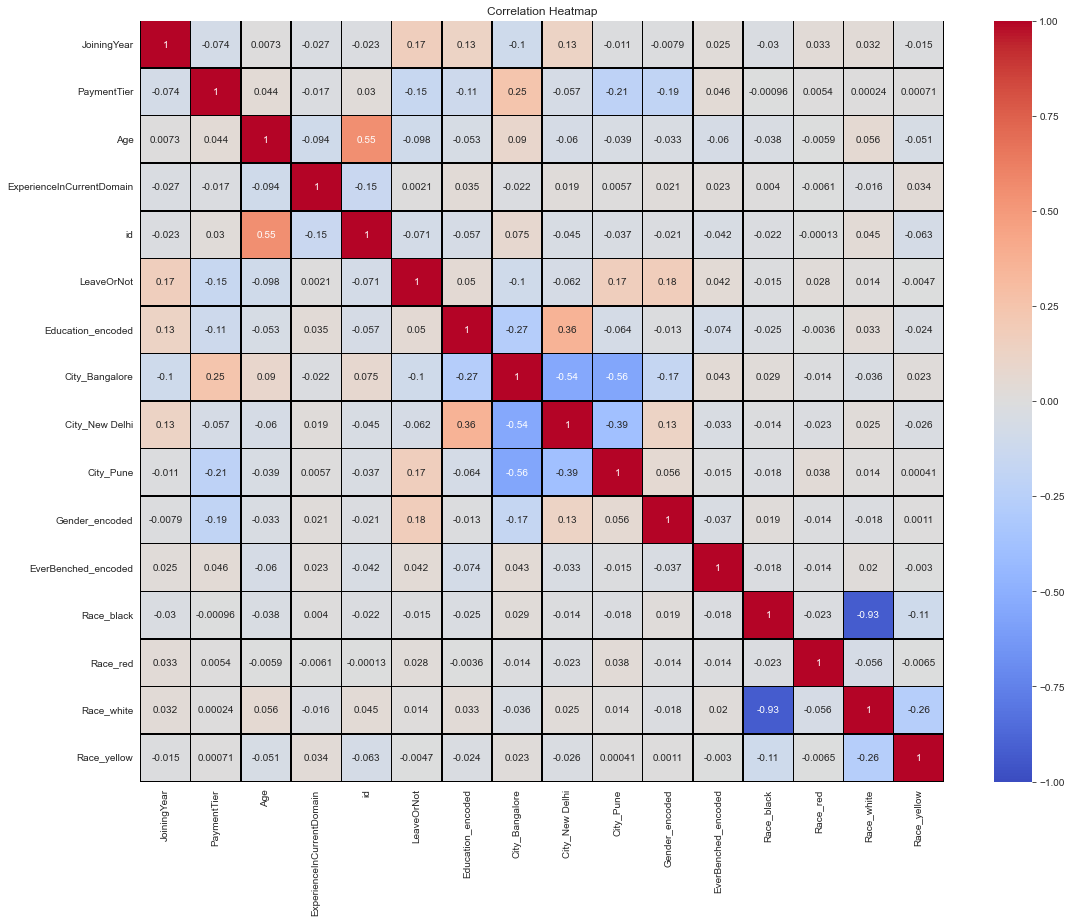

In [33]:
# Plotting the heatmap for correlations
plt.figure(figsize=(18, 14))
sns.heatmap(train.corr(), annot=True, cmap='coolwarm', vmin=-1, vmax=1, linewidths=0.5, linecolor='black')
plt.title('Correlation Heatmap')
plt.show()


Features like Race_yellow, Race_white, and Race_red have very low correlations with LeaveOrNot. While they could be candidates for removal, we should be cautious about potential non-linear relationships or interactions

In [34]:
#Scale Features
from sklearn.preprocessing import StandardScaler

# Initialize the scaler
scaler = StandardScaler()

# Define the features to scale, excluding the 'LeaveOrNot' and 'id' columns
features_to_scale = train.columns.drop(['LeaveOrNot', 'id'])

# Apply scaling to the features
train[features_to_scale] = scaler.fit_transform(train[features_to_scale])

# Display the first few rows of the scaled dataframe
train.head()


,JoiningYear,PaymentTier,Age,ExperienceInCurrentDomain,id,LeaveOrNot,Education_encoded,City_Bangalore,City_New Delhi,City_Pune,Gender_encoded,EverBenched_encoded,Race_black,Race_red,Race_white,Race_yellow
0,0.487924,0.568028,-0.902044,0.780779,1847,0,-0.550719,1.127147,-0.613191,-0.633368,-0.874903,2.701693,-0.616372,-0.037082,0.664890,-0.175458
1,-1.639803,0.568028,-0.704059,0.780779,2905,0,-0.550719,1.127147,-0.613191,-0.633368,-0.874903,-0.370138,-0.616372,-0.037082,0.664890,-0.175458
2,-0.044008,0.568028,-1.100029,-0.478932,4610,1,-0.550719,-0.887196,-0.613191,1.578862,1.142984,-0.370138,-0.616372,-0.037082,0.664890,-0.175458
3,-1.639803,0.568028,-0.506074,-1.108788,2228,0,-0.550719,1.127147,-0.613191,-0.633368,-0.874903,-0.370138,1.622396,-0.037082,-1.504007,-0.175458
4,0.487924,0.568028,-1.495998,-1.738643,5,0,-0.550719,1.127147,-0.613191,-0.633368,-0.874903,-0.370138,-0.616372,-0.037082,0.664890,-0.175458


In [35]:
# Exporting the current dataframe after dropping original categorical columns
path_after_scale = "./combined_train_scaling.csv"
train.to_csv(path_after_scale, index=False)


<b>Modeling</b>

In [36]:
#splitting the data.

# Set random_state
rnd_state = 10

from sklearn.model_selection import train_test_split, StratifiedKFold

# Separate the features and the target variable
X = train.drop(columns=['LeaveOrNot', 'id'])
y = train['LeaveOrNot']

# Split the data into training and testing sets (70% train, 30% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=rnd_state, stratify=y)

# Confirm the shape of the training and testing data
X_train.shape, X_test.shape, y_train.shape, y_test.shape

# kfold
kfold = StratifiedKFold(n_splits=5,shuffle=True, random_state=rnd_state)


In [39]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
import xgboost as xgb
import lightgbm as lgb

# Defining the classifiers and their hyperparameters
classifiers = {
    'Logistic Regression': {
        'model': LogisticRegression(random_state=rnd_state),
        'params': {
            'C': [0.3, 0.5, 1],
            'penalty': ['l1', 'l2']
        }
    },
    'Decision Tree': {
        'model': DecisionTreeClassifier(random_state=rnd_state),
        'params': {
            'max_depth': [7, 8, 9],
            'min_samples_split': [14, 15, 16]
        }
    },
    'KNN': {
        'model': KNeighborsClassifier(),
        'params': {
            'n_neighbors': [3]
        }
    },
    'Gaussian Naive Bayes': {
        'model': GaussianNB(),
        'params': {}
    },
    'Random Forest': {
        'model': RandomForestClassifier(random_state=rnd_state),
        'params': {
            'n_estimators': [100, 110],
            'max_depth': [15],
            'min_samples_split': [11, 12],
            'min_samples_leaf': [3, 4],
            'max_features': ['auto'],
            'bootstrap': [False]
        }
    },
    'Gradient Boosting': {
        'model': GradientBoostingClassifier(random_state=rnd_state),
        'params': {
            'n_estimators': [120, 130],
            'learning_rate': [0.03],
            'max_depth': [5],
            'subsample': [0.9],
            'min_samples_split': [3, 4, 5]
        }
    },
    'AdaBoost': {
        'model': AdaBoostClassifier(random_state=rnd_state),
        'params': {
            'n_estimators': [50],
            'learning_rate': [1.2, 1.3],
            'algorithm' : ['SAMME', 'SAMME.R']
        }
    },
    'XGBoost': {
        'model': xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss'),
        'params': {
            'n_estimators': [110, 120],
            'learning_rate': [0.04, 0.05],
            'max_depth': [4, 5],
            'gamma': [0.1],
            'subsample': [0.9, 1.0],
            'colsample_bytree': [0.8, 0.9]
        }
    },
    'LightGBM': {
        'model': lgb.LGBMClassifier(force_row_wise=True, random_state=rnd_state),
        'params': {
            'n_estimators': [70, 80, 90],
            'learning_rate': [0.3, 0.4],
            'max_depth': [2,3, 4]
        }
    }
}


In [40]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import f1_score, roc_auc_score, precision_score, recall_score, accuracy_score

# To store the best model and its metrics for each classifier
results = {}

# Function to compute metrics for the best model from GridSearchCV
def compute_metrics(best_model, X_test, y_test):
    y_pred = best_model.predict(X_test)
    f1 = f1_score(y_test, y_pred)
    auc = roc_auc_score(y_test, best_model.predict_proba(X_test)[:, 1])
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    accuracy = accuracy_score(y_test, y_pred)
    return f1, auc, precision, recall, accuracy


# Iterating over each classifier and performing Grid Search
for classifier_name, classifier_info in classifiers.items():
    # GridSearchCV
    grid_search = GridSearchCV(classifier_info['model'], classifier_info['params'],
                               cv=kfold, scoring='f1', n_jobs=-1, verbose=1)
    grid_search.fit(X_train, y_train)

    # Compute metrics for the best model
    f1, auc, precision, recall, accuracy = compute_metrics(grid_search.best_estimator_, X_test, y_test)

    # Store results
    results[classifier_name] = {
        'F1 Score': f1,
        'AUC': auc,
        'Precision': precision,
        'Recall': recall,
        'Accuracy': accuracy,
        'Best Parameters': grid_search.best_params_
    }


results_df = pd.DataFrame(results).T
results_df


Fitting 5 folds for each of 6 candidates, totalling 30 fits


C:\Users\yaniv\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:925: UserWarning: One or more of the test scores are non-finite: [       nan 0.50658363        nan 0.50767176        nan 0.50724076]
  category=UserWarning


Fitting 5 folds for each of 9 candidates, totalling 45 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Fitting 5 folds for each of 6 candidates, totalling 30 fits
Fitting 5 folds for each of 4 candidates, totalling 20 fits
Fitting 5 folds for each of 32 candidates, totalling 160 fits


C:\Users\yaniv\anaconda3\lib\site-packages\xgboost\data.py:114: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  "because it will generate extra copies and increase " +
C:\Users\yaniv\anaconda3\lib\site-packages\xgboost\data.py:114: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  "because it will generate extra copies and increase " +


Fitting 5 folds for each of 18 candidates, totalling 90 fits
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 776, number of negative: 1263
[LightGBM] [Info] Total Bins 71
[LightGBM] [Info] Number of data points in the train set: 2039, number of used features: 13
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.380579 -> initscore=-0.487093
[LightGBM] [Info] Start training from score -0.487093
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGB

,F1 Score,AUC,Precision,Recall,Accuracy,Best Parameters
Logistic Regression,0.487985,0.697638,0.634615,0.396396,0.683066,"{'C': 0.5, 'penalty': 'l2'}"
Decision Tree,0.713568,0.839040,0.806818,0.639640,0.804348,"{'max_depth': 8, 'min_samples_split': 15}"
KNN,0.582651,0.722342,0.640288,0.534535,0.708238,{'n_neighbors': 3}
Gaussian Naive Bayes,0.415323,0.673702,0.631902,0.309309,0.668192,{}
Random Forest,0.708333,0.838695,0.839506,0.612613,0.807780,"{'bootstrap': False, 'max_depth': 15, 'max_fea..."
Gradient Boosting,0.724196,0.848040,0.829457,0.642643,0.813501,"{'learning_rate': 0.03, 'max_depth': 5, 'min_s..."
AdaBoost,0.660808,0.801796,0.796610,0.564565,0.779176,"{'algorithm': 'SAMME', 'learning_rate': 1.2, '..."
XGBoost,0.746218,0.859383,0.847328,0.666667,0.827231,"{'colsample_bytree': 0.8, 'gamma': 0.1, 'learn..."
LightGBM,0.698517,0.839858,0.773723,0.636637,0.790618,"{'learning_rate': 0.3, 'max_depth': 3, 'n_esti..."


In [41]:
for item in results_df.index:
    print(item,results_df.loc[item]['Best Parameters'])


Logistic Regression {'C': 0.5, 'penalty': 'l2'}
Decision Tree {'max_depth': 8, 'min_samples_split': 15}
KNN {'n_neighbors': 3}
Gaussian Naive Bayes {}
Random Forest {'bootstrap': False, 'max_depth': 15, 'max_features': 'auto', 'min_samples_leaf': 4, 'min_samples_split': 12, 'n_estimators': 100}
Gradient Boosting {'learning_rate': 0.03, 'max_depth': 5, 'min_samples_split': 3, 'n_estimators': 120, 'subsample': 0.9}
AdaBoost {'algorithm': 'SAMME', 'learning_rate': 1.2, 'n_estimators': 50}
XGBoost {'colsample_bytree': 0.8, 'gamma': 0.1, 'learning_rate': 0.05, 'max_depth': 5, 'n_estimators': 110, 'subsample': 0.9}
LightGBM {'learning_rate': 0.3, 'max_depth': 3, 'n_estimators': 80}


In [ ]:
#TODO: Balancing The Dataset
from sklearn.utils import resample

#Separate majority and minority classes
df_majority = df[df.LeaveOrNot==0]
df_minority = df[df.LeaveOrNot==1]

# Upsample minority class
df_minority_upsampled = resample(df_minority,
                                 replace=True,
                                 n_samples=,
                                 random_state=10)

# Combine majority class with upsampled minority class
df_upsampled = pd.concat([df_majority, df_minority_upsampled])
df_upsampled['LeaveOrNot'].value_counts()

#Visualizing the Geography
df_upsampled['LeaveOrNot'].value_counts().plot(kind = 'bar')


In [ ]:
#TODO: feature selection ?
